In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# File to Load (Remember to Change These)
file_to_load = "gamesales.csv"

# Read Purchasing File and store into Pandas data frame
game_data = pd.read_csv(file_to_load)

game_data.head(18000)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,Nancy Drew: The Deadly Secret of Olde World Park,DS,2007.0,Adventure,Majesco Entertainment,0.00,0.00,0.00,0.00,0.01,64.0,7.0,NaN,NaN,E
17412,Fashion Designer: Style Icon,DS,2007.0,Simulation,505 Games,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17413,Ashita no Joe 2: The Anime Super Remix,PS2,2002.0,Fighting,Capcom,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17414,NadePro!! Kisama no Seiyuu Yatte Miro!,PS2,2009.0,Adventure,GungHo,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN


In [4]:
#cleanup the csv file and dropNA
gamedata=game_data.dropna(how='any')
gamedata

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,Tom Clancys Splinter Cell,PC,2003.0,Action,Ubisoft,0.00,0.00,0.00,0.00,0.01,91.0,20.0,8.5,291.0,T
17401,Blacksite: Area 51,PC,2007.0,Shooter,Midway Games,0.00,0.00,0.00,0.00,0.01,60.0,20.0,4.9,42.0,T
17402,Virtua Tennis 2009,PC,2009.0,Sports,Sega,0.00,0.00,0.00,0.00,0.01,68.0,8.0,6.5,19.0,E
17404,CivCity: Rome,PC,2006.0,Strategy,Take-Two Interactive,0.00,0.00,0.00,0.00,0.01,67.0,46.0,6.9,32.0,E10+


In [5]:
#total sales of the game globally by year
globally_total=game_data["Global_Sales"].sum()
glo_total=globally_total.round(2)
print(glo_total)

8994.83


In [6]:
# Top 10 best sales game
game_groupby=gamedata.groupby(['Name']).head()
game_groupby

game_sort=game_groupby.sort_values(['Global_Sales'],ascending=False)
game_sort.head(10)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,87.0,80.0,8.4,595.0,E
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.48,4.13,1.90,23.22,91.0,64.0,8.6,465.0,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,E
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.02,4.91,0.24,1.69,21.86,61.0,45.0,6.3,106.0,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,E


In [7]:
game_top10 = game_sort[:10]
game_top10

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,87.0,80.0,8.4,595.0,E
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.48,4.13,1.90,23.22,91.0,64.0,8.6,465.0,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,E
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.02,4.91,0.24,1.69,21.86,61.0,45.0,6.3,106.0,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,E


In [8]:
gamename=game_top10['Name']
gamecrt=game_top10['Critic_Score']
gameuser=game_top10['User_Score']*10
toptenframe=pd.DataFrame({'Name':gamename,'Critic_Score':gamecrt,'User_Score':gameuser})
toptenframe
pdtopten=toptenframe.rename(index={0: '1',2:'2',3:'3',6:'4',7:'5',8:'6',11:'7',13:'8',14:'9',15:'10'})
pdtopten


,Name,Critic_Score,User_Score
1,Wii Sports,76.0,80.0
2,Mario Kart Wii,82.0,83.0
3,Wii Sports Resort,80.0,80.0
4,New Super Mario Bros.,89.0,85.0
5,Wii Play,58.0,66.0
6,New Super Mario Bros. Wii,87.0,84.0
7,Mario Kart DS,91.0,86.0
8,Wii Fit,80.0,77.0
9,Kinect Adventures!,61.0,63.0
10,Wii Fit Plus,80.0,74.0


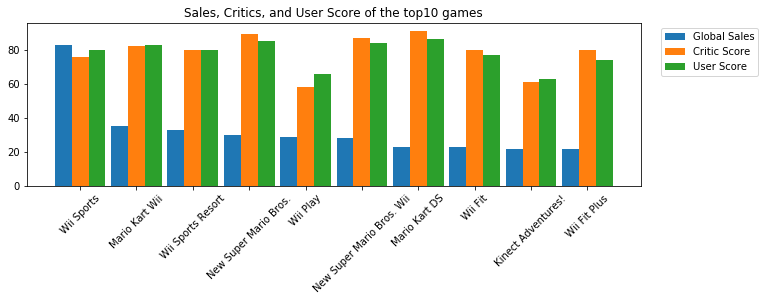

In [9]:
#3. Did critical and user reviews correlate with the total sales of the game globally? by year

#-----trimodal bar graph of user vs critical reviews vs total sales
# I think it depends on the data that if we would get unimodal, bimodal, or multimodal graphs. 
# So to make tromodal graph is technically not right. 
# Instead, the bar graph can be used to varify the possible correlation.

game_top10 = game_sort[:10]
game_top10.head(10)

x_axis = np.arange(len(game_top10['Name']))

plt.figure(figsize=(11,3))
width = 0.3

tick_locations = [value for value in x_axis]

plt.bar(x_axis - width, game_top10['Global_Sales'], width, label='Global Sales')
plt.bar(x_axis, game_top10['Critic_Score'], width, label='Critic Score')
plt.bar(x_axis + width, game_top10['User_Score']*10, width, label='User Score')

plt.xticks(tick_locations, list(game_top10['Name']), rotation=45)

plt.title('Sales, Critics, and User Score of the top10 games')

plt.legend(bbox_to_anchor = (1.2,1))
plt.savefig("Sales, Critics, and User Score of the top10 games.png", bbox_inches='tight', dpi=600)
plt.show()




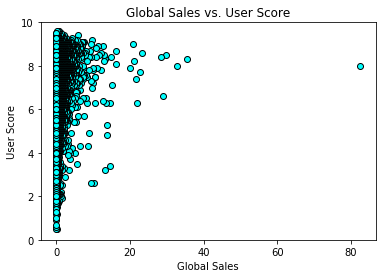

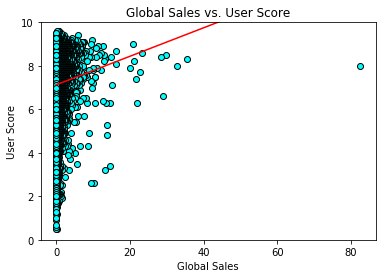

Line regression equation: y = 0.0656 x + 7.1262
R2: 0.087918


<Figure size 432x288 with 0 Axes>

In [10]:
# Scatter plot showing the corralation between global sales and user scores
plt.scatter(gamedata['Global_Sales'],gamedata['User_Score'],marker='o',facecolors='cyan',edgecolors='black',alpha=1)

plt.title("Global Sales vs. User Score")
plt.xlabel("Global Sales")
plt.ylabel("User Score")
plt.ylim(0,10)
plt.show()

# line regression
from scipy.stats import linregress

(slope,intercept,rvalue,pvalue,stderr)=linregress(gamedata['Global_Sales'],gamedata['User_Score'])
regress_values=slope*gamedata['Global_Sales']+intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq='y = {str(round(slope,2))}x + {str(round(intercept,2))}'

plt.scatter(gamedata['Global_Sales'],gamedata['User_Score'],marker='o',facecolors='cyan',edgecolors='black',alpha=1)
plt.plot(gamedata['Global_Sales'],regress_values,"r-")

plt.title("Global Sales vs. User Score")
plt.xlabel("Global Sales")
plt.ylabel("User Score")
plt.ylim(0,10)
plt.show()
plt.savefig("Global Sales vs. User Score.png", bbox_inches='tight', dpi=600)

print('Line regression equation:','y =',slope.round(4),'x +',intercept.round(4))
print('R2:', rvalue.round(6))

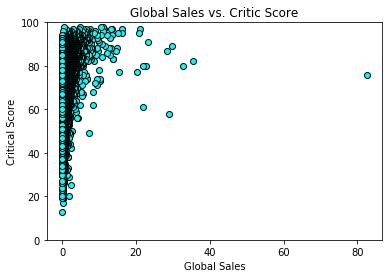

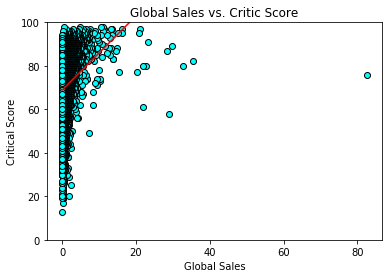

Line regression equation: y = 1.7028 x + 68.9263
R2: 0.237317


In [11]:
# Scatter plot showing the corralation between global sales and critic scores
plt.scatter(gamedata['Global_Sales'],gamedata['Critic_Score'],marker='o',facecolors='cyan',edgecolors='black',alpha=1)

plt.title("Global Sales vs. Critic Score")
plt.xlabel("Global Sales")
plt.ylabel("Critical Score")
plt.ylim(0,100)
plt.show()

# line regression
from scipy.stats import linregress

(slope,intercept,rvalue,pvalue,stderr)=linregress(gamedata['Global_Sales'],gamedata['Critic_Score'])
regress_values=slope*gamedata['Global_Sales']+intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq='y = {str(round(slope,2))}x + {str(round(intercept,2))}'

plt.scatter(gamedata['Global_Sales'],gamedata['Critic_Score'],marker='o',facecolors='cyan',edgecolors='black',alpha=1)
plt.plot(gamedata['Global_Sales'],regress_values,"r-")

plt.title("Global Sales vs. Critic Score")
plt.xlabel("Global Sales")
plt.ylabel("Critical Score")
plt.ylim(0,100)
plt.savefig("Global Sales vs.Critic Score.png", bbox_inches='tight', dpi=600)
plt.show()

print('Line regression equation:','y =',slope.round(4),'x +',intercept.round(4))
print('R2:', rvalue.round(6))


The average sale of games is 0.7653065241844924
The IQR of topsale games (Global sales>10) is 1.8
The IQR of fairsale games (1<Global sales<10) is 1.5
The IQR of poorsale games (Global sales<1) is 1.9


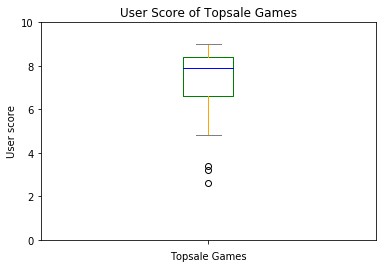

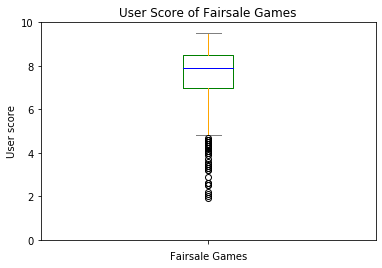

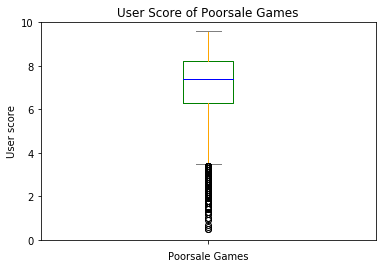

In [16]:
#Box plot showing the correlation between the sales and scores

#Step1: Divide the data by global sales

Ave_sale = gamedata['Global_Sales'].mean()
print ('The average sale of games is',Ave_sale)

topsale = gamedata[gamedata['Global_Sales'] >= 10]
fairsale = gamedata[(gamedata['Global_Sales'] > 1) & (gamedata['Global_Sales'] < 10)]
poorsale = gamedata[gamedata['Global_Sales'] <= 1]

#Step2: Calculate IQR of user score
q1_topsale = topsale['User_Score'].quantile(0.25)
q3_topsale = topsale['User_Score'].quantile(0.75)
IQR_topsale = q3_topsale-q1_topsale

q1_fairsale = fairsale['User_Score'].quantile(0.25)
q3_fairsale = fairsale['User_Score'].quantile(0.75)
IQR_fairsale = q3_fairsale-q1_fairsale 

q1_poorsale = poorsale['User_Score'].quantile(0.25)
q3_poorsale = poorsale['User_Score'].quantile(0.75)
IQR_poorsale = q3_poorsale-q1_poorsale 

print ('The IQR of topsale games (Global sales>10) is',IQR_topsale.round(2))
print ('The IQR of fairsale games (1<Global sales<10) is',IQR_fairsale.round(2))
print ('The IQR of poorsale games (Global sales<1) is',IQR_poorsale.round(2))


#Step3: Plot the box graph
props = dict(boxes="green", whiskers="orange", medians="blue", caps="gray")
box1=topsale.boxplot(color=props,column =['User_Score'], grid = False)
plt.title('User Score of Topsale Games')
plt.ylabel("User score")
plt.xlabel("Topsale Games")
box1.set_ylim(0, 10)
empty_string_labels = ['']*len(labels)
box1.set_xticklabels(empty_string_labels)
plt.savefig("User Score of Topsale Games.png", bbox_inches='tight', dpi=600)
plt.show()


box2=fairsale.boxplot(color=props,column =['User_Score'], grid = False)
plt.title('User Score of Fairsale Games')
plt.ylabel("User score")
plt.xlabel("Fairsale Games")
box2.set_ylim(0,10)
empty_string_labels = ['']*len(labels)
box2.set_xticklabels(empty_string_labels)
plt.savefig("User Score of Fairsale Games.png", bbox_inches='tight', dpi=600)
plt.show()

box3=poorsale.boxplot(color=props,column =['User_Score'], grid = False)
plt.title('User Score of Poorsale Games')
plt.ylabel("User score")
plt.xlabel("Poorsale Games")
box3.set_ylim(0, 10)
empty_string_labels = ['']*len(labels)
box3.set_xticklabels(empty_string_labels)
plt.savefig("User Score of Poorsale Games.png", bbox_inches='tight', dpi=600)
plt.show()

The IQR of topsale games (Global sales>10) is 15.0
The IQR of fairsale games (1<Global sales<10) is 13.0
The IQR of poorsale games (Global sales<1) is 18.0


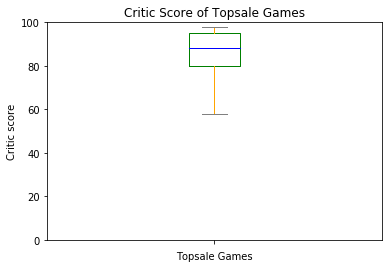

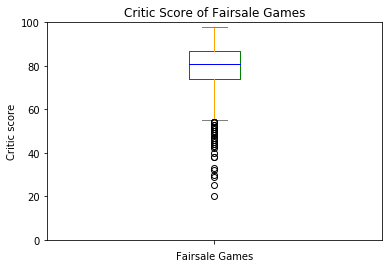

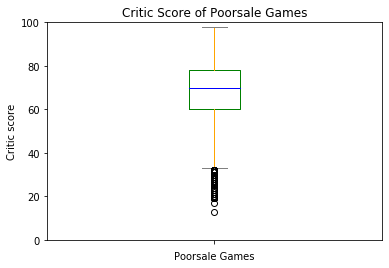

In [18]:
#Box plot showing the correlation between the sales and scores

#Step1: Divide the data by global sales

#Step2: Calculate IQR of critic score
q1_topsale = topsale['Critic_Score'].quantile(0.25)
q3_topsale = topsale['Critic_Score'].quantile(0.75)
IQR_topsale = q3_topsale-q1_topsale

q1_fairsale = fairsale['Critic_Score'].quantile(0.25)
q3_fairsale = fairsale['Critic_Score'].quantile(0.75)
IQR_fairsale = q3_fairsale-q1_fairsale 

q1_poorsale = poorsale['Critic_Score'].quantile(0.25)
q3_poorsale = poorsale['Critic_Score'].quantile(0.75)
IQR_poorsale = q3_poorsale-q1_poorsale 

print ('The IQR of topsale games (Global sales>10) is',IQR_topsale.round(2))
print ('The IQR of fairsale games (1<Global sales<10) is',IQR_fairsale.round(2))
print ('The IQR of poorsale games (Global sales<1) is',IQR_poorsale.round(2))


#Step3: Plot the box graph
box1=topsale.boxplot(color=props,column =['Critic_Score'], grid = False)
plt.title('Critic Score of Topsale Games')
plt.ylabel("Critic score")
plt.xlabel("Topsale Games")
box1.set_ylim(0, 100)
empty_string_labels = ['']*len(labels)
box1.set_xticklabels(empty_string_labels)
plt.savefig("Critic Score of Topsale Games.png", bbox_inches='tight', dpi=600)
plt.show()


box2=fairsale.boxplot(color=props,column =['Critic_Score'], grid = False)
plt.title('Critic Score of Fairsale Games')
plt.ylabel("Critic score")
plt.xlabel("Fairsale Games")
box2.set_ylim(0,100)
empty_string_labels = ['']*len(labels)
box2.set_xticklabels(empty_string_labels)
plt.savefig("Critic Score of Fairsale Games.png", bbox_inches='tight', dpi=600)
plt.show()


box3=poorsale.boxplot(color=props,column =['Critic_Score'], grid = False)
plt.title('Critic Score of Poorsale Games')
plt.ylabel("Critic score")
plt.xlabel("Poorsale Games")
box3.set_ylim(0, 100)
empty_string_labels = ['']*len(labels)
box3.set_xticklabels(empty_string_labels)
plt.savefig("Critic Score of poorsale Games.png", bbox_inches='tight', dpi=600)
plt.show()
